In [34]:
import cads_sdk as cs
import spark_sdk as ss
from cads_sdk.nosql import display
ss.__version__

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


'0.4.20'

In [2]:
from cads_sdk.pytorch.converter import ConvertFromZipImage

print(ConvertFromZipImage.__doc__)

In [3]:
converter = ConvertFromZipImage(
              input_path="/home/hunght21/projects/facemaskclassification/data/facemask.zip",
              input_recursive = True, # will loop through folder to get all pattern
              input_type = ('jpg', 'png'),
    
              #setting output
              output_path = f"file:/home/hunght21/projects/facemaskclassification/data/facemask",
    
              compression = 'zstd', # zstd|snappy
              # setting converter
              image_type = 'png',
              image_color = 3,
              resize_mode=None, # |padding|resize
              size = [(224,224)],
              debug = False,
             )

converter.execute()

2023-04-24 16:04:33,585 - INFO - Total file in zip: 37150
2023-04-24 16:04:33,601 - INFO - Write at path: file:/home/hunght21/projects/facemaskclassification/data/facemask.parquet
2023-04-24 16:04:33,601 - INFO - Save metadata at: 


23/04/24 16:04:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/24 16:04:36 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


2023-04-24 16:04:40,206 - WARNING - Not resize image, If get size error try to turn resize_mode='padding' or resize_mode='resize'
2023-04-24 16:04:41,281 - INFO - Total folder memory: 1214006376
<IPython.core.display.HTML object>                                  (0 + 8) / 8]
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
2023-04-24 16:23:03,715 - INFO - Convert complete                               


In [16]:
from petastorm.etl.dataset_metadata import materialize_dataset
import spark_sdk as ss
spark = ss.PySpark().spark

Schema = converter.create_image_schema(size=[224,224], image_type='jpg', image_color=3)
ROWGROUP_SIZE_MB = 256

In [9]:
df_train = ss.sql("""
select *
from parquet.`file:/home/hunght21/projects/facemaskclassification/data/facemask.parquet`
where path like "%/train/%"
""")

In [18]:
output_path = f"file:/home/hunght21/projects/facemaskclassification/data/facemask" + "_train.parquet"
with materialize_dataset(spark, output_path, Schema, ROWGROUP_SIZE_MB):
    df_train.to_dwh(hdfs_path = output_path,
                    table_name = 'facemask_train',
                    database = 'default',
                    compression = 'zstd'
                   )

/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insi

In [22]:
df_val = ss.sql("""
select *
from parquet.`file:/home/hunght21/projects/facemaskclassification/data/facemask.parquet`
where path like "%/val/%"
""")

In [25]:
output_path = f"file:/home/hunght21/projects/facemaskclassification/data/facemask" + "_val.parquet"
with materialize_dataset(spark, output_path, Schema, ROWGROUP_SIZE_MB):
    df_val.to_dwh(hdfs_path = output_path,
                    table_name = 'acemask_val',
                    database = 'default',
                    compression = 'zstd'
                   )

/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insigthface/lib/python3.8/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/hunght21/envs/insi

In [39]:
df = ss.sql("""
select * 
from parquet.`file:/home/hunght21/projects/facemaskclassification/data/facemask.parquet`
""")

,path,size,image
0,facemask/train/mask/20200428-175240-2515469130-38507-3455-571.jpg,"(224, 224, 3)",
1,facemask/train/mask/3099.jpg,"(224, 224, 3)",
2,facemask/train/mask/20200421-111248-1957229546-1013773-25811-625.jpg,"(224, 224, 3)",
3,facemask/train/mask/20200420-153449-4185801598-889920-10490-395.jpg,"(224, 224, 3)",
4,facemask/train/mask/20200420-153126-4167945688-934264-23078-718.jpg,"(224, 224, 3)",
...,...,...,...
95,facemask/train/mask/20200414-173419-1125760778-376955-8395-679.jpg,"(224, 224, 3)",
96,facemask/train/mask/2475.jpg,"(224, 224, 3)",
97,facemask/train/mask/20200414-184254-1496122748-384132-9379-668.jpg,"(224, 224, 3)",
98,facemask/train/mask/1043.jpg,"(224, 224, 3)",

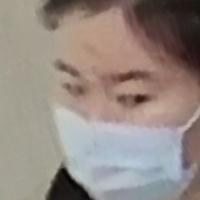
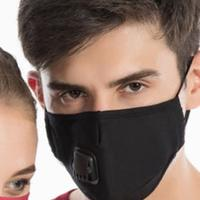
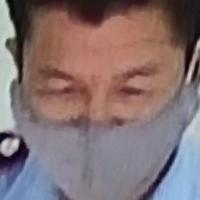
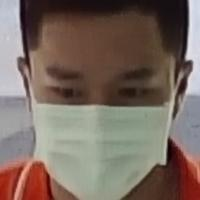
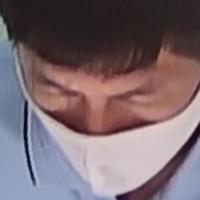
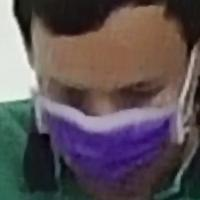
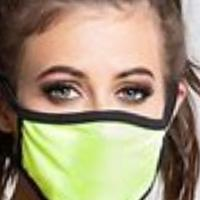
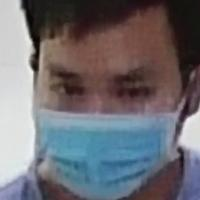
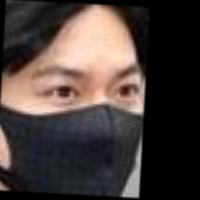
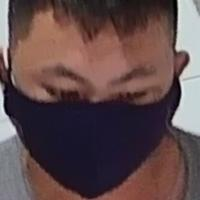

In [44]:
pdf = df[1000:1100].toPandasImage()
pdf